# Example 005: Canted Striaght with 2 Undulators

In this example the electron trajectory in a mock-straight section with two undulators and center canting magnet is calculated in two ways.  Firstly it is calculated with initial conditions given at z=0 (in the middle), then for the initial conditions given before the first undulator.



In [1]:
# This has nothing to do with OSCARS, but it puts the matplotlib plots inline in the notebook
%matplotlib inline

# Import the OSCARS SR module
import oscars.sr

# Import basic plot utilities (matplotlib).  You don't need these to run OSCARS, but it's used here for basic plots
from oscars.plots_mpl import *

OSCARS v1.31.05 - Open Source Code for Advanced Radiation Simulation
Brookhaven National Laboratory, Upton NY, USA
http://oscars.bnl.gov
oscars@bnl.gov


In [2]:
# Create a new OSCARS SR object
osr = oscars.sr.sr()

## Create the undulator and Canting Magnet Fields

Here we create the undulator fields and Bending Magnet fields.

For the undulator, *bfield* represents maximum magnetic field [$B_x, B_y, B_z$].  The *period* is also in vector form which allows you to orient the axis of the undulator in any arbitrary direction.  The number of periods is given by *nperiods*.  This is the number of FULL periods.  A terminating field of 1 period length is added to each side in addition to *nperiods*.

For the canting magnets we will use the gaussian field.  *bfield* represents maximum magnetic field [$B_x, B_y, B_z$].  *sigma* is the 1-sigma width and can be given an any direction (if zero, that coordinate is ignored).

Typically clear_magnetic_fields() is called before adding a field in notebooks only to save time when making changes and rerunning sections of the code so it is not strictly necessary.

The undulators and canting magnets are placed in space using the *translate* option.

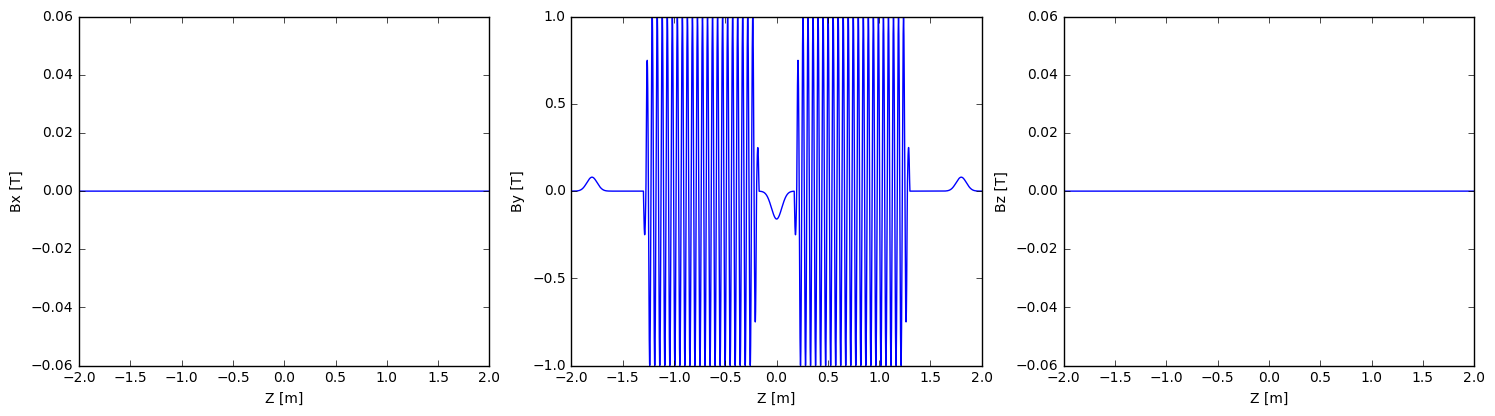

In [3]:
# Clear any existing fields (just good habit in notebook style) and add an undulator field
osr.clear_bfields()
dist_between_centers = 0.049*15

osr.add_bfield_gaussian(bfield=[0, +0.08, 0], sigma=[0, 0, 0.05], translation=[0, 0, -1.8])
osr.add_bfield_undulator(bfield=[0, 1, 0], period=[0, 0, 0.049], nperiods=21, translation=[0, 0, -dist_between_centers])
osr.add_bfield_gaussian(bfield=[0, -0.16, 0], sigma=[0, 0, 0.05], translation=[0, 0, 0])
osr.add_bfield_undulator(bfield=[0, 1, 0], period=[0, 0, 0.049], nperiods=21, translation=[0, 0, +dist_between_centers])
osr.add_bfield_gaussian(bfield=[0, +0.08, 0], sigma=[0, 0, 0.05], translation=[0, 0, 1.8])

# Just to check the field that we added seems visually correct
plot_bfield(osr, -2, 2)

## Add a particle beam

Now we add a simple particle beam.  There are a few important things to understand about the setup of magnetic fields and particle beams, namely positions and times.  You can define the initial position and time of a particle beam to be anywhere you like.  The default initial time for a beam is t=0.  For perfectly symmetric data sometimes it is convenient to set the initial conditions in the middle of your scenario.  Often with real data it is more practical to set it before entry of the first device of interest.  Both of these are shown below.

One must specify ctstartstop, and they are notebly different for the two examples of beam setups below.

clear_particle_beams() is called, again for convenience, but it is not necessary.

In [4]:
# Setup beam similar to NSLSII
osr.clear_particle_beams()
osr.set_particle_beam(type='electron',
                      name='beam_0',
                      x0=[0, 0, 0],
                      d0=[0, 0, 1],
                      energy_GeV=3,
                      current=0.500
                     )

# Set the start and stop times for the calculation
osr.set_ctstartstop(-3, 3)

## Calculate Trajectory

Now we calculate the trajectory and plot it.  It is enough to call calculate_trajectory().  If you are doing other calculations (flux, spectra, power density) it is not necesary to call this since it is called internally.

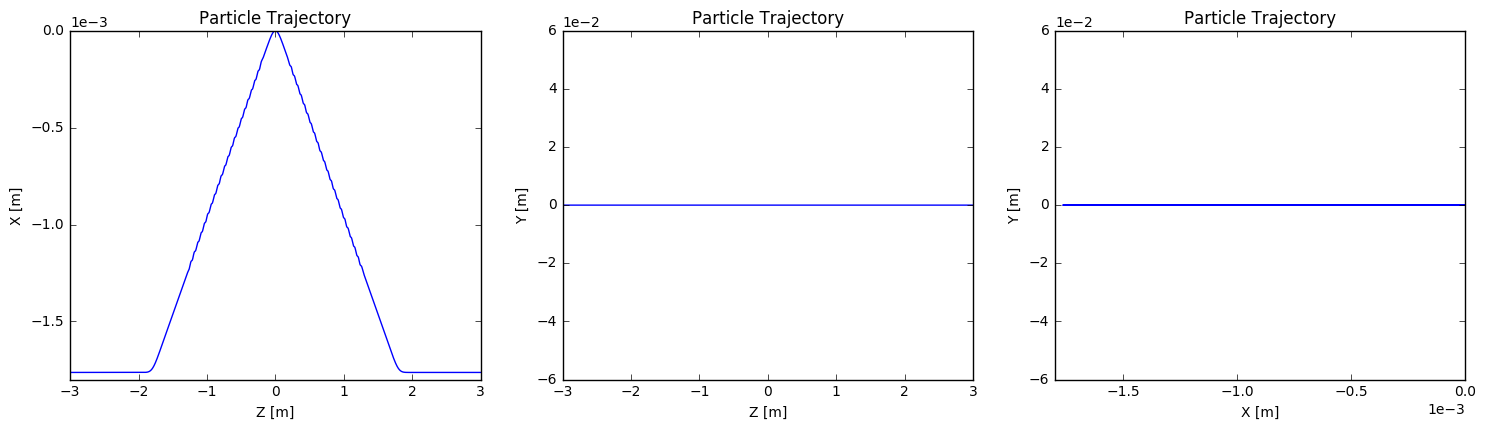

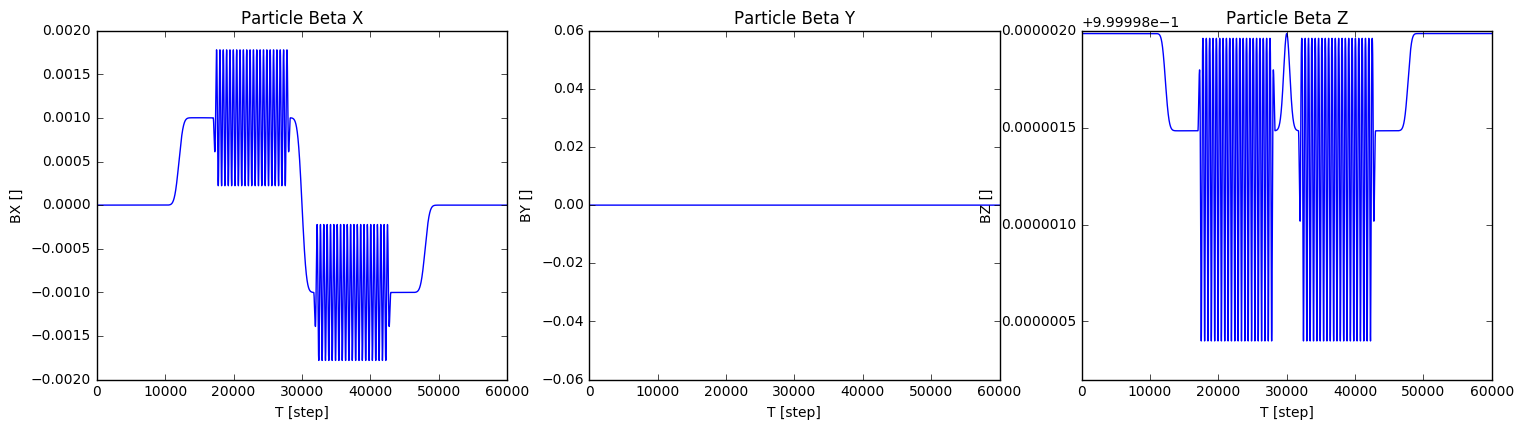

In [5]:
# Run the particle trajectory calculation
trajectory = osr.calculate_trajectory()

# Plot the trajectory position and velocity
plot_trajectory_position(trajectory)
plot_trajectory_velocity(trajectory)

Now set the initial conditions before entry of the first canting magnet (often this is more practical).

In [6]:
# Setup beam similar to NSLSII with different starting position from above
# (this makes more sense for some scenarios)
osr.clear_particle_beams()
osr.set_particle_beam(type='electron',
                      name='beam_0',
                      x0=[0, 0, -3],
                      d0=[0, 0, 1],
                      energy_GeV=3,
                      current=0.500
                     )

# Set the start and stop times for the calculation
osr.set_ctstartstop(0, 6)

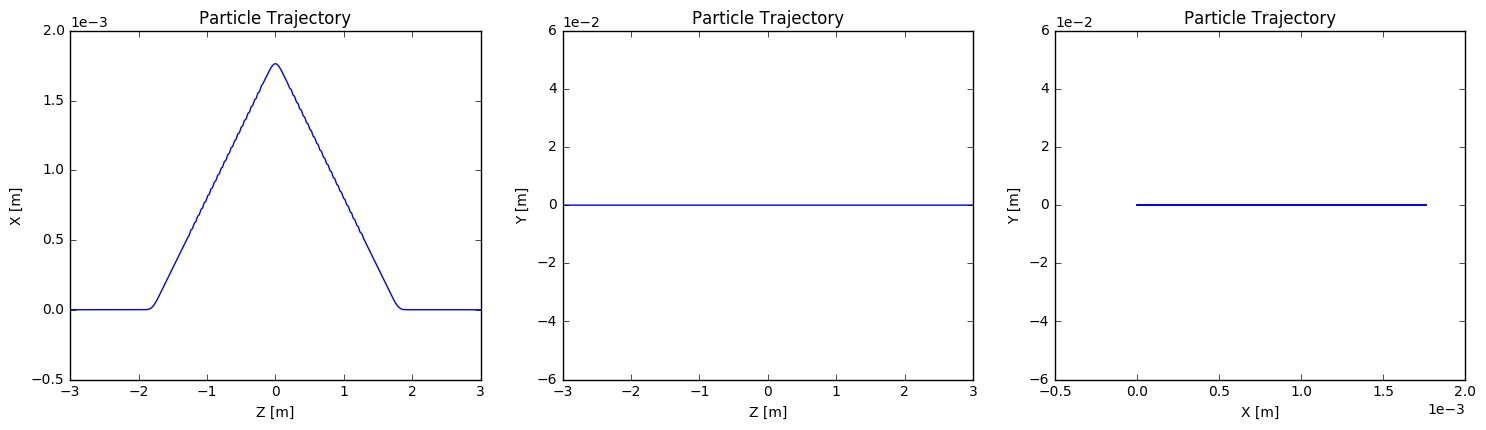

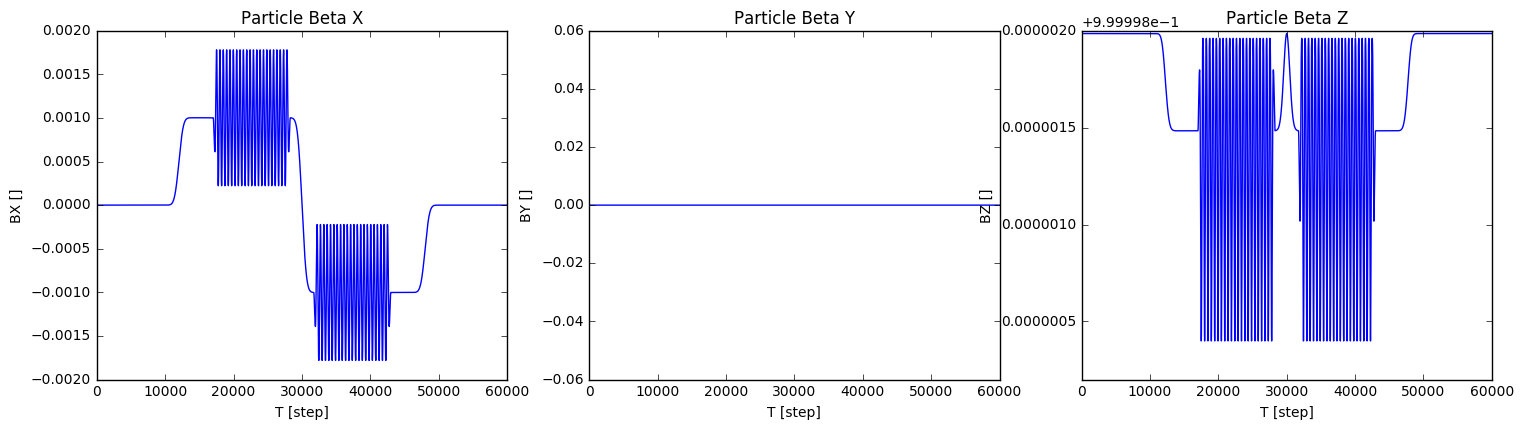

In [7]:
# Run the particle trajectory calculation
trajectory = osr.calculate_trajectory()

# Plot the trajectory position and velocity
plot_trajectory_position(trajectory)
plot_trajectory_velocity(trajectory)

In [8]:
# If you want to convert the notebook to HTML
import os
os.system('jupyter nbconvert --to html Example_005_CantedStraightTrajectory.ipynb')

0